In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longtitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs =zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longtitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.

cities =[]

# Identify the nearest city for each latitude and longtitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
                               
    # if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

601

In [6]:
# Import the requests library
import requests
import time

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd00c3f6b1bff1e30f23d26dccaf525b


In [8]:
# Import the datetime module from the datetime library

from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval          ")
print("----------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count += 1
    
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval          
----------------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | beringovskiy
Processing Record 6 of Set 1 | hailar
Processing Record 7 of Set 1 | namatanai
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | abiy adi
City not found. Skipping...
Processing Record 13 of Set 1 | omboue
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | maun
Processing Record 17 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 

Processing Record 32 of Set 4 | saint-honore
Processing Record 33 of Set 4 | pevek
Processing Record 34 of Set 4 | bargal
City not found. Skipping...
Processing Record 35 of Set 4 | kruisfontein
Processing Record 36 of Set 4 | fairbanks
Processing Record 37 of Set 4 | kunming
Processing Record 38 of Set 4 | tautira
Processing Record 39 of Set 4 | ust-kuyga
Processing Record 40 of Set 4 | kermanshah
Processing Record 41 of Set 4 | gravdal
Processing Record 42 of Set 4 | healdsburg
Processing Record 43 of Set 4 | prince rupert
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | pychas
Processing Record 46 of Set 4 | erzin
Processing Record 47 of Set 4 | worthington
Processing Record 48 of Set 4 | kasongo
Processing Record 49 of Set 4 | aklavik
Processing Record 50 of Set 4 | fortuna
Processing Record 1 of Set 5 | hervey bay
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | kupang
Processing Record 4 of Set 5 | culiacan
Processing Record 5 of Se

Processing Record 21 of Set 8 | yar-sale
Processing Record 22 of Set 8 | antofagasta
Processing Record 23 of Set 8 | damietta
Processing Record 24 of Set 8 | ahipara
Processing Record 25 of Set 8 | shenzhen
Processing Record 26 of Set 8 | neiafu
Processing Record 27 of Set 8 | lavrentiya
Processing Record 28 of Set 8 | samusu
City not found. Skipping...
Processing Record 29 of Set 8 | salalah
Processing Record 30 of Set 8 | banda aceh
Processing Record 31 of Set 8 | bengkulu
Processing Record 32 of Set 8 | sesheke
Processing Record 33 of Set 8 | buchanan
Processing Record 34 of Set 8 | waitara
Processing Record 35 of Set 8 | barmer
Processing Record 36 of Set 8 | praxedis guerrero
Processing Record 37 of Set 8 | amderma
City not found. Skipping...
Processing Record 38 of Set 8 | sidi ali
Processing Record 39 of Set 8 | krasnogorsk
Processing Record 40 of Set 8 | dullewala
Processing Record 41 of Set 8 | ngorongoro
Processing Record 42 of Set 8 | kushmurun
Processing Record 43 of Set 8 

Processing Record 11 of Set 12 | verkh-usugli
Processing Record 12 of Set 12 | umm kaddadah
Processing Record 13 of Set 12 | berezovyy
Processing Record 14 of Set 12 | tsaratanana
Processing Record 15 of Set 12 | bonthe
Processing Record 16 of Set 12 | virginia beach
Processing Record 17 of Set 12 | whitehorse
Processing Record 18 of Set 12 | gumia
Processing Record 19 of Set 12 | coahuayana
Processing Record 20 of Set 12 | rio gallegos
Processing Record 21 of Set 12 | nichinan
Processing Record 22 of Set 12 | suez
Processing Record 23 of Set 12 | mullovka
Processing Record 24 of Set 12 | abalak
Processing Record 25 of Set 12 | flin flon
Processing Record 26 of Set 12 | watrous
Processing Record 27 of Set 12 | semporna
Processing Record 28 of Set 12 | jurbarkas
Processing Record 29 of Set 12 | urucara
Processing Record 30 of Set 12 | romodanovo
Processing Record 31 of Set 12 | sabzevar
Processing Record 32 of Set 12 | port hardy
Processing Record 33 of Set 12 | porto novo
Processing Re

In [15]:
len(city_data)

556

In [ ]:
#len(city_data)

In [22]:
# Convert the array of dictionaries to a Panda DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,41.00,75,75,14.99,CA,2020-10-12 18:31:24
1,Yellowknife,62.46,-114.35,35.01,80,90,19.46,CA,2020-10-12 18:30:10
2,Punta Arenas,-53.15,-70.92,53.60,71,75,12.75,CL,2020-10-12 18:31:24
3,Ushuaia,-54.80,-68.30,44.60,70,75,18.34,AR,2020-10-12 18:31:24
4,Beringovskiy,63.05,179.32,28.45,97,100,15.97,RU,2020-10-12 18:31:24
5,Hailar,49.20,119.70,29.19,86,100,8.32,CN,2020-10-12 18:31:24
6,Namatanai,-3.67,152.43,79.59,81,23,6.08,PG,2020-10-12 18:31:24
7,Khatanga,71.97,102.50,24.87,98,100,13.44,RU,2020-10-12 18:31:25
8,Provideniya,64.38,-173.30,31.15,90,100,11.99,RU,2020-10-12 18:31:25
9,Omboue,-1.57,9.26,76.55,84,100,9.89,GA,2020-10-12 18:31:26


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2020-10-12 18:31:24,55.74,-97.86,41.00,75,75,14.99
1,Yellowknife,CA,2020-10-12 18:30:10,62.46,-114.35,35.01,80,90,19.46
2,Punta Arenas,CL,2020-10-12 18:31:24,-53.15,-70.92,53.60,71,75,12.75
3,Ushuaia,AR,2020-10-12 18:31:24,-54.80,-68.30,44.60,70,75,18.34
4,Beringovskiy,RU,2020-10-12 18:31:24,63.05,179.32,28.45,97,100,15.97
...,...,...,...,...,...,...,...,...,...
551,Trairi,BR,2020-10-12 18:43:55,-3.28,-39.27,82.62,64,0,15.77
552,Nautla,MX,2020-10-12 18:43:55,20.22,-96.78,86.32,65,42,8.46
553,Tonantins,BR,2020-10-12 18:43:55,-2.87,-67.80,94.17,43,100,3.53
554,Brun,AM,2020-10-12 18:43:55,39.53,46.31,47.70,66,0,2.19


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

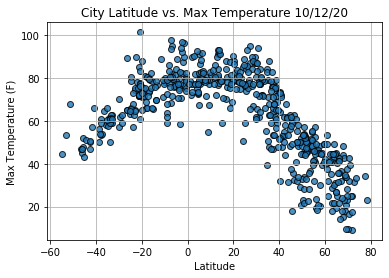

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

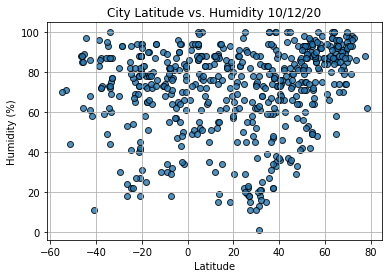

In [28]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

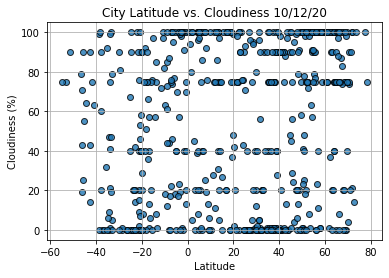

In [29]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

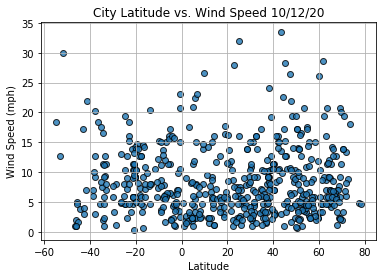

In [83]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [84]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [121]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    


In [53]:
index13 = city_data_df.loc[13]
index13

City                        Tiksi
Lat                         71.69
Lng                        128.87
Max Temp                     9.12
Humidity                       93
Cloudiness                     21
Wind Speed                   6.04
Country                        RU
Date          2020-10-12 18:31:27
Name: 13, dtype: object

In [54]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
551    False
552     True
553    False
554     True
555    False
Name: Lat, Length: 556, dtype: bool

In [55]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,41.00,75,75,14.99,CA,2020-10-12 18:31:24
1,Yellowknife,62.46,-114.35,35.01,80,90,19.46,CA,2020-10-12 18:30:10
4,Beringovskiy,63.05,179.32,28.45,97,100,15.97,RU,2020-10-12 18:31:24
5,Hailar,49.20,119.70,29.19,86,100,8.32,CN,2020-10-12 18:31:24
7,Khatanga,71.97,102.50,24.87,98,100,13.44,RU,2020-10-12 18:31:25


In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
541,Jijiga,9.35,42.80,67.48,45,0,14.76,ET,2020-10-12 18:41:32
542,Qianan,44.99,124.06,37.74,72,45,0.98,CN,2020-10-12 18:43:54
543,Sinegorskiy,48.01,40.84,57.99,74,13,6.08,RU,2020-10-12 18:43:54
545,Fuling,29.70,107.39,60.67,88,12,2.24,CN,2020-10-12 18:43:54
546,Saint Anthony,45.02,-93.22,62.01,36,1,12.75,US,2020-10-12 18:43:54
547,Dagda,56.10,27.54,49.12,90,100,2.28,LV,2020-10-12 18:43:54
549,Sakakah,29.97,40.21,80.60,11,0,10.29,SA,2020-10-12 18:42:09
550,Kulachi,31.93,70.46,80.29,16,0,6.71,PK,2020-10-12 18:43:54
552,Nautla,20.22,-96.78,86.32,65,42,8.46,MX,2020-10-12 18:43:55
554,Brun,39.53,46.31,47.70,66,0,2.19,AM,2020-10-12 18:43:55


In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]



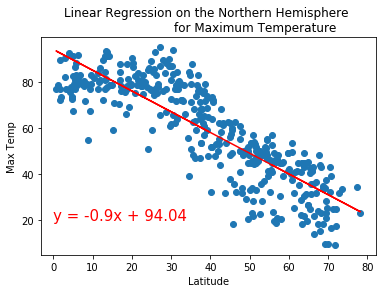

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(0,20))

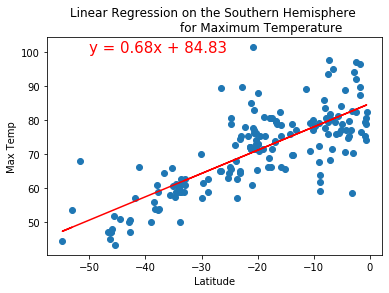

In [128]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,100))

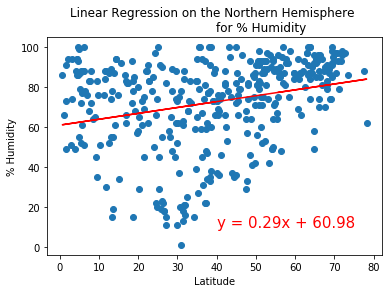

In [129]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

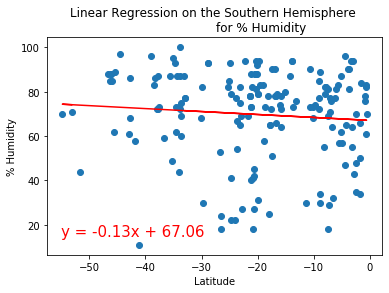

In [134]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-55,15))


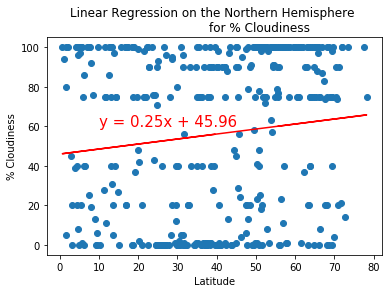

In [140]:
# Linear regression on the Northen Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Cloudiness ', '% Cloudiness',(10,60))

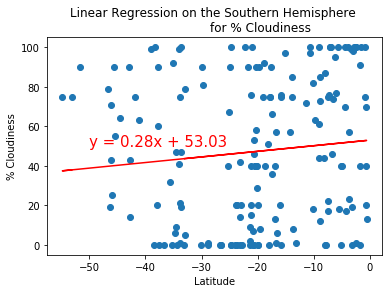

In [142]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,50))